In [15]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [2]:
series = pd.read_csv('mon_trial_select.csv', index_col='date_plus', parse_dates=True)
print(series.head())

            modal_price
date_plus              
2014-09-01         1575
2014-11-01         1629
2015-01-01         1618
2015-02-01         1650
2015-03-01         1525


In [77]:
df = series.reset_index().rename(columns={'date_plus':'ds', 'modal_price':'y'})
df['y'] = np.log(df['y'])

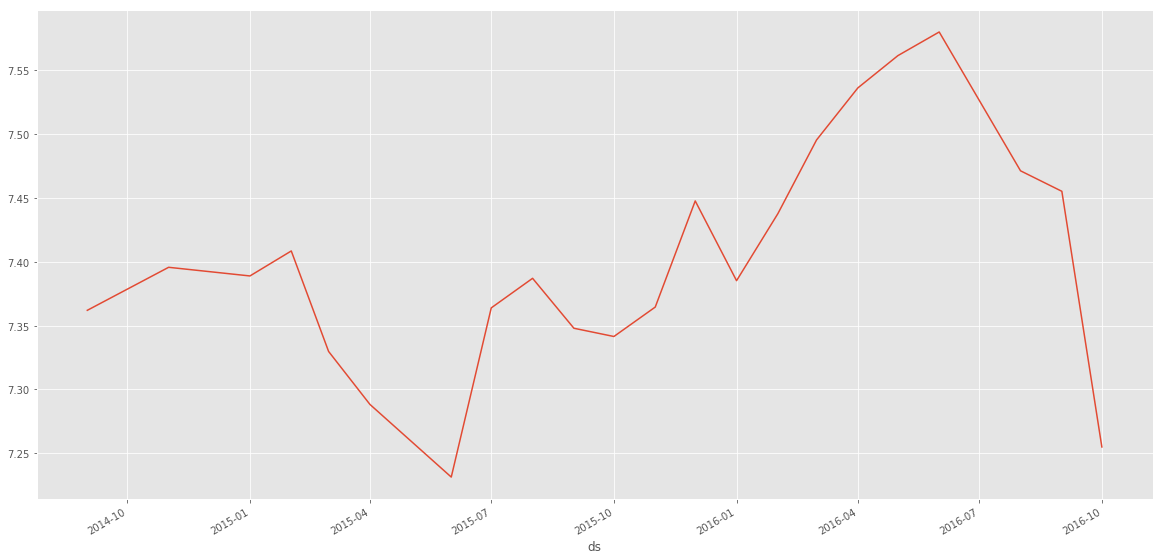

In [78]:
df.set_index('ds').y.plot()

In [79]:
df_train = df.iloc[0:15, :]
df_test = df.iloc[15:22, :]

### Prophet without any parameters

In [80]:
model = Prophet()
model.fit(df_train);
future = model.make_future_dataframe(periods=7, freq = 'm')
forecast = model.predict(future)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 11.0.
C:\Users\Architect_shwet\Anaconda3\lib\site-packages\fbprophet\forecaster.py:353: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  np.linspace(0, hist_size - 1, self.n_changepoints + 1)
C:\Users\Architect_shwet\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


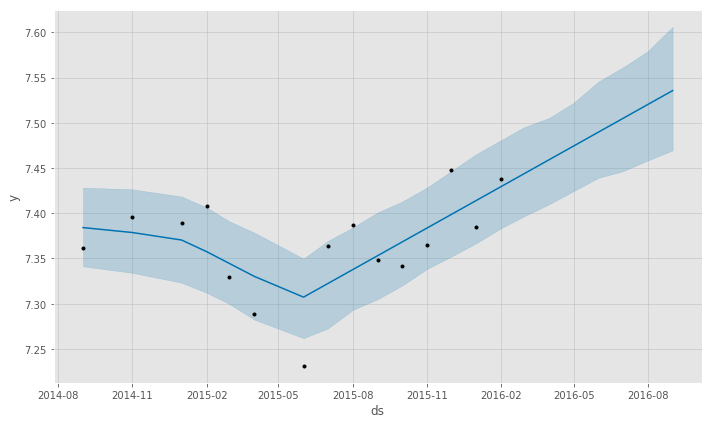

In [81]:
model.plot(forecast);

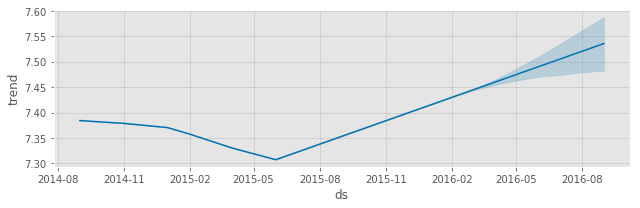

In [82]:
model.plot_components(forecast);

In [83]:
forecast['ds'] = df['ds']

In [84]:
forecast_test = forecast.iloc[15:22,:]

In [85]:
metric_df = forecast_test.set_index('ds')[['yhat']].join(df_test.set_index('ds').y).reset_index()

In [90]:
metric_df.head()

,yhat,y,yhat_rescaled,y_rescaled
ds,,,,
2016-03-01,7.443692,7.495542,1709.048542,1800.0
2016-04-01,7.459183,7.536364,1735.730032,1875.0
2016-05-01,7.474175,7.561642,1761.947372,1923.0
2016-06-01,7.489666,7.580189,1789.454713,1959.0
2016-08-01,7.504658,7.471363,1816.483538,1757.0


In [87]:
metric_df['yhat_rescaled'] = np.exp(metric_df['yhat'])
metric_df['y_rescaled'] = np.exp(metric_df['y'])

In [88]:
metric_df = metric_df.set_index('ds')

In [91]:
sqrt(mean_squared_error(metric_df.y_rescaled, metric_df.yhat_rescaled))

210.3275302776231

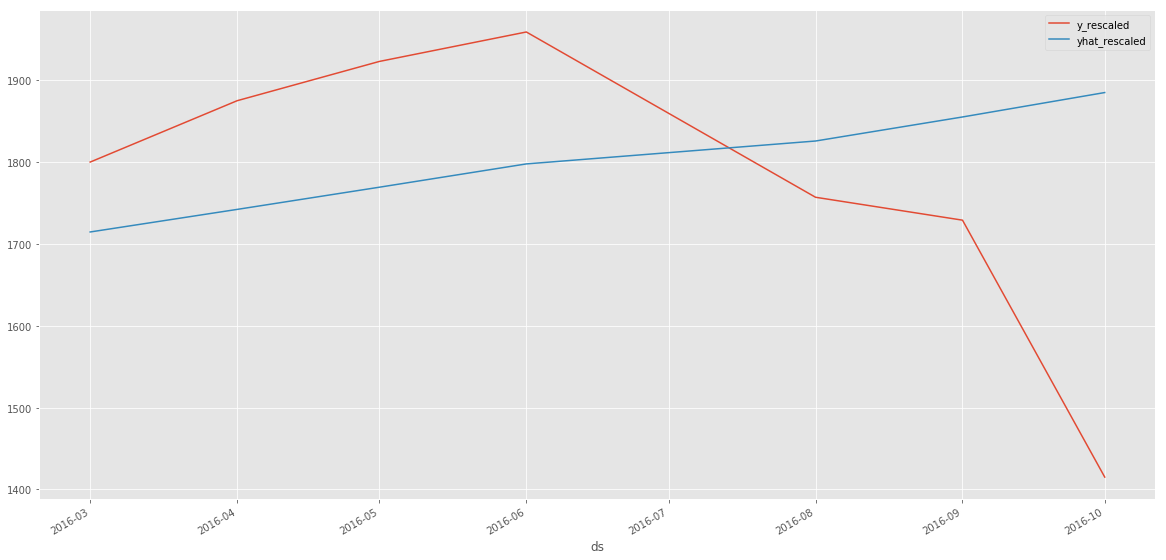

In [26]:
metric_df[['y_rescaled', 'yhat_rescaled']].plot()

#### Saturating forecast

In [94]:
df.y.max()

7.580189417944541

In [95]:
# Python
df['cap'] = 7.580189417944541

In [96]:
df_train = df.iloc[0:15, :]
df_test = df.iloc[15:22, :]

In [99]:
# Python
models = Prophet(growth='logistic')
models.fit(df_train)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 11.0.
C:\Users\Architect_shwet\Anaconda3\lib\site-packages\fbprophet\forecaster.py:353: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  np.linspace(0, hist_size - 1, self.n_changepoints + 1)
C:\Users\Architect_shwet\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


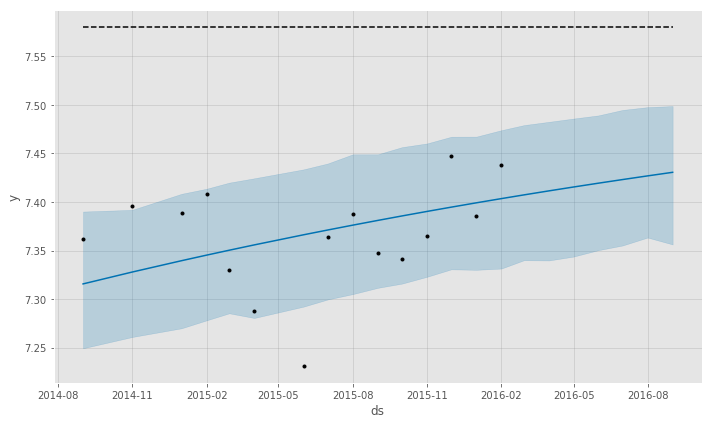

In [100]:
# Python
future = models.make_future_dataframe(periods=7, freq = 'm')
future['cap'] = 7.580189417944541
forecast = models.predict(future)
fig = models.plot(forecast)

In [101]:
forecast['ds'] = df['ds']

In [102]:
forecast_test = forecast.iloc[15:22,:]

In [103]:
metric_df = forecast_test.set_index('ds')[['yhat']].join(df_test.set_index('ds').y).reset_index()

In [104]:
metric_df.head()

,ds,yhat,y
0,2016-03-01,7.407250,7.495542
1,2016-04-01,7.411397,7.536364
2,2016-05-01,7.415318,7.561642
3,2016-06-01,7.419276,7.580189
4,2016-08-01,7.423018,7.471363


In [105]:
metric_df['yhat_rescaled'] = np.exp(metric_df['yhat'])
metric_df['y_rescaled'] = np.exp(metric_df['y'])

In [106]:
metric_df = metric_df.set_index('ds')

In [107]:
sqrt(mean_squared_error(metric_df.y_rescaled, metric_df.yhat_rescaled))

209.75218817299495

In [ ]:
metric_df[['y_rescaled', 'yhat_rescaled']].plot()

#### Changepoints

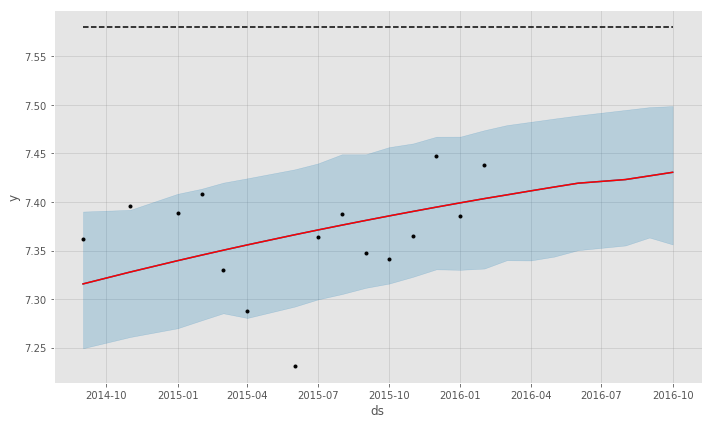

In [108]:
from fbprophet.plot import add_changepoints_to_plot
fig = models.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), models, forecast)

#### Goal is to find the changepoint from the train data

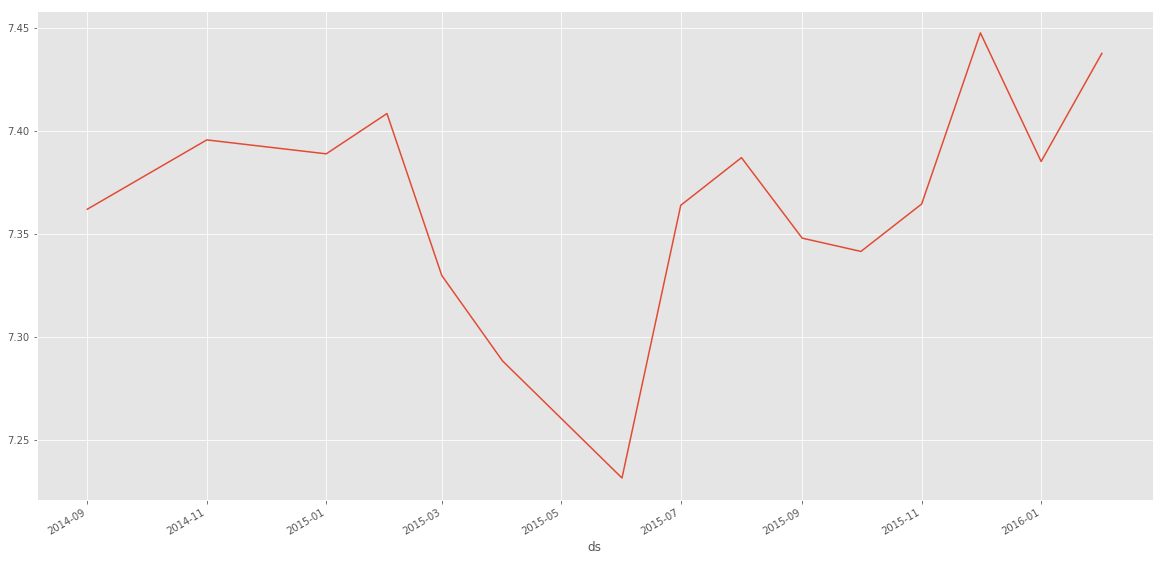

In [110]:
df_train.set_index('ds').y.plot()

In [111]:
df_train.head(15)

,ds,y,cap
0,2014-09-01,7.362011,7.580189
1,2014-11-01,7.395722,7.580189
2,2015-01-01,7.388946,7.580189
3,2015-02-01,7.408531,7.580189
4,2015-03-01,7.329750,7.580189
5,2015-04-01,7.288244,7.580189
6,2015-06-01,7.231287,7.580189
7,2015-07-01,7.363914,7.580189
8,2015-08-01,7.387090,7.580189
9,2015-09-01,7.347944,7.580189


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Architect_shwet\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


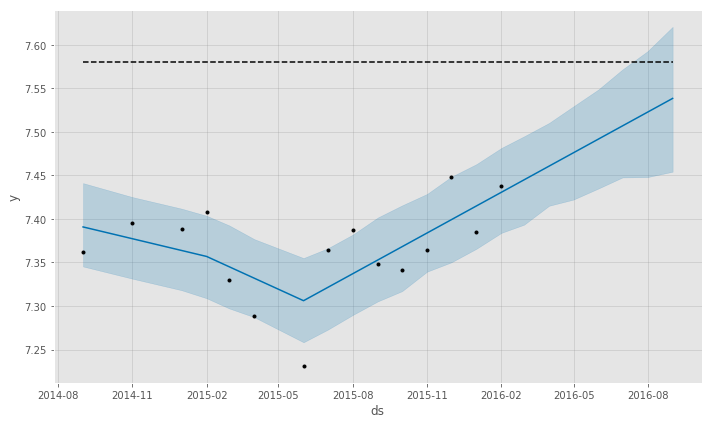

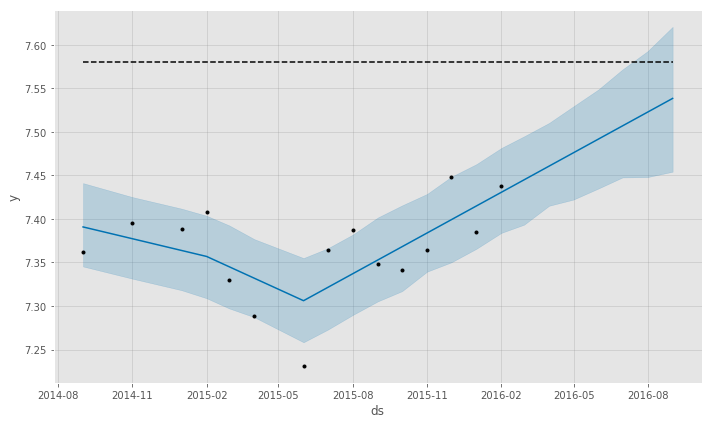

In [126]:
m_change = Prophet(changepoints=['2015-02-01', '2015-06-01', '2015-08-01'])
m_change.fit(df_train)
future = m_change.make_future_dataframe(periods=7, freq = 'm')
future['cap'] = 7.580189417944541
forecast = m_change.predict(future)
fig = m_change.plot(forecast)
fig = m_change.plot(forecast)

In [127]:
forecast['ds'] = df['ds']
forecast_test = forecast.iloc[15:22,:]
metric_df = forecast_test.set_index('ds')[['yhat']].join(df_test.set_index('ds').y).reset_index()
metric_df['yhat_rescaled'] = np.exp(metric_df['yhat'])
metric_df['y_rescaled'] = np.exp(metric_df['y'])
metric_df = metric_df.set_index('ds')
sqrt(mean_squared_error(metric_df.y_rescaled, metric_df.yhat_rescaled))

211.41391828945132

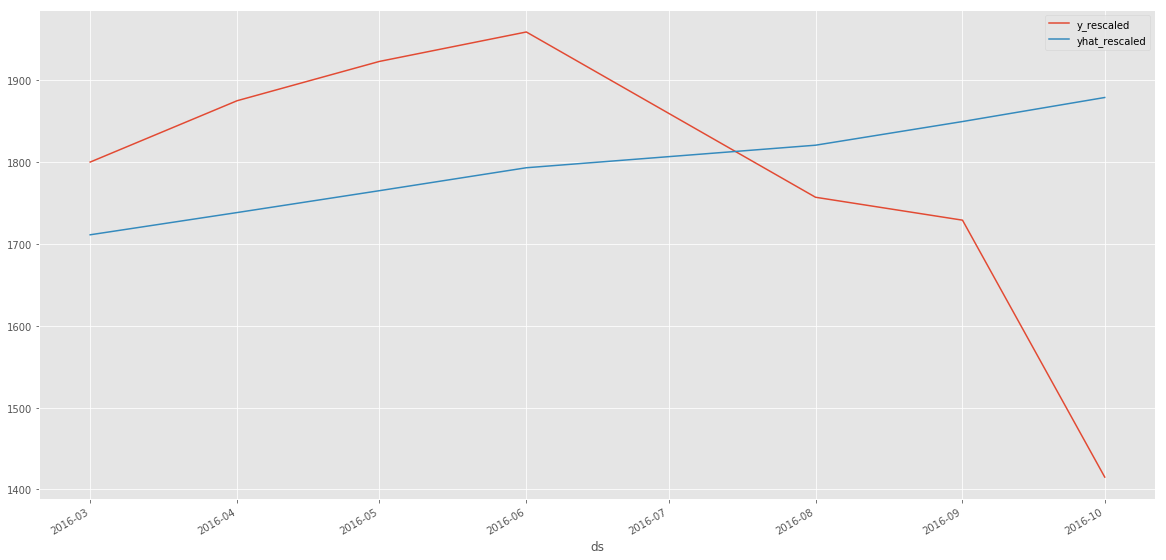

In [119]:
metric_df[['y_rescaled', 'yhat_rescaled']].plot()